# Classification using random and Nyström features.

Author: <alberto.suarez@uam.es>

In this notebook we illustrate the use of random and Nystöm features with linear SVMs to carry out non-linear classification.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import kernel_approximation as ka

from sklearn import svm
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.kernel_approximation import RBFSampler
from sklearn import datasets

In [2]:
"""
# A simple 2 D problem
np.random.seed(0)
n_samples = 300
X = np.random.randn(n_samples, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
"""
# A not so simple 2 D problem
noise = 0.3

# Training set 
X, y = datasets.make_moons(n_samples=100, noise=noise, random_state=0)

# Test set 
X_test, y_test = datasets.make_moons(n_samples=1000, noise=noise)

# Compute grid of points for plotting the decision regions

grid_x1, grid_x2 = np.meshgrid(
    np.linspace(-3, 3, 50),
    np.linspace(-3, 3, 50),
)

grid_X = np.c_[grid_x1.ravel(), grid_x2.ravel()]

# Plot the decision regions 
def plot_decision_regions(X, y, grid_x1, grid_x2, features_grid, clf):

    # plot the decision function for each datapoint on the grid
    Z = clf.decision_function(features_grid)
    Z = Z.reshape(grid_x1.shape)


    plt.imshow(Z, interpolation='nearest',
    extent=(grid_x1.min(), grid_x1.max(), grid_x2.min(), grid_x2.max()), aspect='auto',
    origin='lower', cmap=plt.cm.PuOr_r)

    contours = plt.contour(grid_x1, grid_x2, Z, levels=[0], linewidths=2,
    linestyles='dashed')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
    edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis([np.min(grid_x1), np.max(grid_x1), np.min(grid_x2), np.max(grid_x2)])
    plt.show()

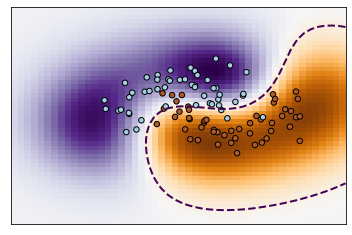

In [3]:
# Nonlinear SVM 

gamma = 0.5
sigma = np.sqrt(1.0 / 2.0 / gamma)

clf = svm.SVC(kernel='rbf', gamma=gamma)
# clf = svm.NuSVC(gamma=gamma)

clf.fit(X, y)

plot_decision_regions(X, y, grid_x1, grid_x2, grid_X, clf)

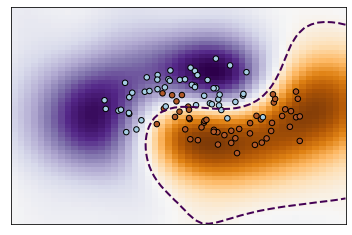

In [4]:
# RBF Fourier random features (sklearn)

n_random_features = 10000

rbf_sampler = RBFSampler(gamma=gamma, n_components=n_random_features, random_state=1)
random_features = rbf_sampler.fit_transform(X)
random_features_grid = rbf_sampler.fit_transform(grid_X)

clf = svm.SVC(kernel='linear')
# clf = svm.NuSVC(gamma='auto')

clf.fit(random_features, y)

plot_decision_regions(X, y, grid_x1, grid_x2, random_features_grid, clf)

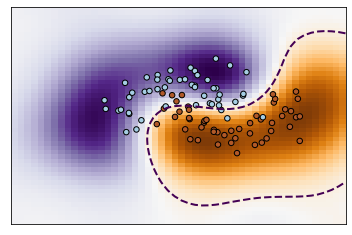

In [5]:
# RBF Fourier random features (our implementation)

rbf_sampler = ka.RandomFeaturesSamplerRBF(sigma)
random_features = rbf_sampler.fit_transform(n_random_features, X)
random_features_grid = rbf_sampler.transform(grid_X)

clf = svm.SVC(kernel='linear')
# clf = svm.NuSVC(gamma='auto')
clf.fit(random_features, y)


plot_decision_regions(X, y, grid_x1, grid_x2, random_features_grid, clf)

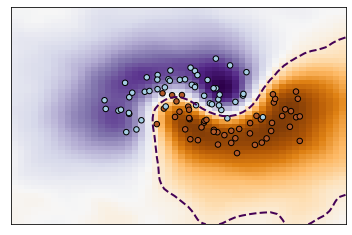

In [6]:
# Matérn Fourier random features (our implementation)
length_scale = sigma
nu = 1.5

matern_sampler = ka.RandomFeaturesSamplerMatern(length_scale, nu)    
random_features = matern_sampler.fit_transform(n_random_features, X)
random_features_grid = matern_sampler.transform(grid_X)

clf = svm.SVC(kernel='linear')
clf.fit(random_features, y)

plot_decision_regions(X, y, grid_x1, grid_x2, random_features_grid, clf)

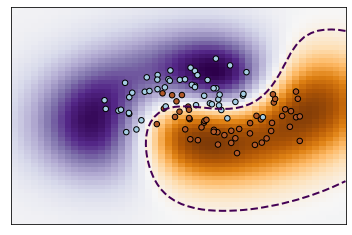

In [7]:
# Nystroem features (our implementation)

# Kernel matrix
def kernel(X, Y):
    return rbf_kernel(X, Y, gamma=gamma) 

n_nystroem_features = 20
# n_nystroem_features = len(X) # Recovers full kernel

nystroem_sampler = ka.NystroemFeaturesSampler(kernel)
nystroem_features = nystroem_sampler.fit_transform(n_nystroem_features, X)
nystroem_features_grid = nystroem_sampler.transform(grid_X)

clf = svm.SVC(kernel='linear')
clf.fit(nystroem_features, y)

plot_decision_regions(X, y, grid_x1, grid_x2, nystroem_features_grid, clf)

## Exercises

1. Afer having scaled the data to the range $[-1, 1]$ using sklearn's *MinMaxScaler*, determine the optimal hyperparameters (gamma, nu) and the optimal number of features for the different classifiers consideres in this example using CV on the training set. Compare the prediction error of the different classifiers in the test set $\left\{X_{test}, y_{test} \right\}$. 

References:
https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py



In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler((-1,1))
X = min_max_scaler.fit_transform(X)
X
X_test= min_max_scaler.transform(X_test)

array([[-0.22848874,  0.55137962],
       [ 0.96212785, -0.24109712],
       [ 0.2577546 , -0.26373255],
       [-0.27805575, -0.2342621 ],
       [ 0.22749938, -0.61928186],
       [ 0.96084736,  0.30218185],
       [ 0.07900691,  0.05318507],
       [ 0.29757595, -0.7832281 ],
       [-0.26324209,  0.09570077],
       [ 0.73394678,  0.07101999],
       [-0.40588102,  0.26545987],
       [ 0.89832394, -0.44274269],
       [ 0.61068547, -0.77808087],
       [ 0.45371526,  0.71317001],
       [ 0.02049933,  0.2139386 ],
       [-0.45599833,  0.6531809 ],
       [-0.07439762,  0.74018855],
       [-0.07264735,  0.42616999],
       [-0.38204859,  0.39167161],
       [ 0.41827966,  0.21844118],
       [-0.58771282,  0.29846393],
       [ 0.01836163, -0.35530961],
       [ 0.14461983,  0.37181928],
       [ 0.1564179 , -0.55761825],
       [-0.62258605, -0.30490913],
       [-0.67320469, -0.49935687],
       [ 0.09967027,  0.03407714],
       [ 1.        , -0.22320597],
       [ 0.85052862,

In [9]:
# Nonlinear SVM 
from sklearn.model_selection import GridSearchCV

tuned_parameters = {"gamma": np.linspace(1e-10,10,50)}

clf = svm.SVC(kernel='rbf')

GS = GridSearchCV(estimator = clf,
                  param_grid = tuned_parameters,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)   

GS.fit(X,y)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END gamma=0.0; neg_root_mean_squared_error: (test=-0.707) r2: (test=-1.000) total time=   0.0s
[CV 2/5] END gamma=0.0; neg_root_mean_squared_error: (test=-0.707) r2: (test=-1.000) total time=   0.0s
[CV 3/5] END gamma=0.0; neg_root_mean_squared_error: (test=-0.707) r2: (test=-1.000) total time=   0.0s
[CV 4/5] END gamma=0.0; neg_root_mean_squared_error: (test=-0.707) r2: (test=-1.000) total time=   0.0s
[CV 5/5] END gamma=0.0; neg_root_mean_squared_error: (test=-0.707) r2: (test=-1.000) total time=   0.0s
[CV 1/5] END gamma=0.20408163265306123; neg_root_mean_squared_error: (test=-0.500) r2: (test=0.000) total time=   0.0s
[CV 2/5] END gamma=0.20408163265306123; neg_root_mean_squared_error: (test=-0.387) r2: (test=0.400) total time=   0.0s
[CV 3/5] END gamma=0.20408163265306123; neg_root_mean_squared_error: (test=-0.592) r2: (test=-0.400) total time=   0.0s
[CV 4/5] END gamma=0.20408163265306123; neg_root_mean_square

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [10]:

print('The best estimator is: \n',GS.best_estimator_)
print('The best parameters is: \n',GS.best_params_)
print('The best score is: \n',GS.best_score_)

The best estimator is: 
 SVC(gamma=6.73469387755102)
The best parameters is: 
 {'gamma': 6.73469387755102}
The best score is: 
 0.76



from sklearn.pipeline import Pipeline

clf = svm.SVC(kernel='linear')

pipe = Pipeline([
    ('rbfs', RBFSampler(random_state=1)),
    ('clf', clf),
])


tuned_parameters = {"rbfs__gamma": np.linspace(0,10,50), "rbfs__n_components": [100,1000,10000,100000]}


GS = GridSearchCV(estimator = pipe,
                  param_grid = tuned_parameters,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)   

GS.fit(X, y)

In [11]:

print('The best estimator is: \n',GS.best_estimator_)
print('The best parameters is: \n',GS.best_params_)
print('The best score is: \n',GS.best_score_)

The best estimator is: 
 SVC(gamma=6.73469387755102)
The best parameters is: 
 {'gamma': 6.73469387755102}
The best score is: 
 0.76


In [16]:
import saez as cka
from sklearn.pipeline import Pipeline

clf = svm.SVC(kernel='linear')

pipe = Pipeline([
    ('rbfs', RBFSampler(random_state=1)),
    ('clf', clf),
])


sigma = np.sqrt(1.0 / 2.0 / gamma)
#rbf_sampler = cka.RandomFeaturesSamplerRBF(sigma)
#random_features = rbf_sampler.fit_transform(n_random_features, X) 
# Hay que eliminar el n_random_features del fit transform y pasarlo al init
rbf_sampler = cka.RandomFeaturesSamplerRBF(sigma, n_random_features)
random_features = rbf_sampler.fit_transform(X) 
clf = svm.SVC(kernel='linear')

pipe = Pipeline([
    ('rbfs', rbf_sampler
),
    ('clf', clf),
])

tuned_parameters = {"rbfs__gamma": np.linspace(2e-10,10,50), "n_components": [10, 20, 50, 100, 250, 500]}


GS = GridSearchCV(estimator = pipe,
                  param_grid = tuned_parameters,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)   

GS.fit(X, y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


ValueError: Invalid parameter n_components for estimator Pipeline(steps=[('rbfs', RandomFeaturesSamplerRBF(n_random_features=10000)),
                ('clf', SVC(kernel='linear'))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
# Matérn Fourier random features (our implementation)
#TODO:Corregir

rbf_sampler = ka.RandomFeaturesSamplerRBF(sigma)
random_features = rbf_sampler.fit_transform(n_random_features)

clf = svm.SVC(kernel='linear')

pipe = Pipeline([
    ('rbfs', rbf_sampler
),
    ('clf', clf),
])


tuned_parameters = {"rbfs__length_scale": np.linspace(0,10,50), "rbfs_nu":np.linspace(0,10,50), "n_components": [100,1000,10000,100000]}


GS = GridSearchCV(estimator = pipe,
                  param_grid = tuned_parameters,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)   

GS.fit(X, y)

In [ ]:
# Nystroem features (our implementation)
#TODO: Corregir
sigma = np.sqrt(1.0 / 2.0 / gamma)
rbf_sampler = ka.RandomFeaturesSamplerRBF(sigma)
random_features = rbf_sampler.fit_transform(n_random_features)

clf = svm.SVC(kernel='linear')

pipe = Pipeline([
    ('rbfs', rbf_sampler
),
    ('clf', clf),
])


tuned_parameters = {"rbfs__gamma": np.linspace(0,10,50), "n_components": [100,1000,10000,100000]}


GS = GridSearchCV(estimator = pipe,
                  param_grid = tuned_parameters,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)   

GS.fit(X, y)

Código para aplicar los algoritmos óptimos al conjunto de test. Hay que decidir si se ponen todos juntos aquí o después de cada método.

In [ ]:
from sklearn import metrics 

y_hat = GS.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_hat))

Accuracy:  0.686
